# Introduction to Reservoir Computing and ReservoirPy

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge

rpy.verbosity(0)
# Make everything deterministic
rpy.set_seed(2341)

## A simple example: Mackey-Glass

<class 'numpy.ndarray'> (2000, 1)


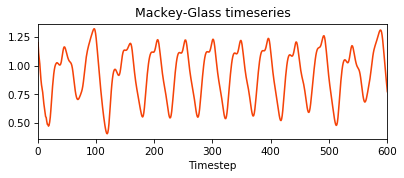

In [2]:
# Importing the chaotic Mackey-Glass timeseries
from reservoirpy.datasets import mackey_glass

timeseries = mackey_glass(n_timesteps=2_000, tau=17, seed=260_418)

print(type(timeseries), timeseries.shape)

plt.figure(figsize=(6, 2))
plt.title("Mackey-Glass timeseries")
plt.plot(timeseries)
plt.xlim(0, 600)
plt.xlabel("Timestep")
plt.show()

(1580, 1) (400, 1) (1580, 1) (400, 1)


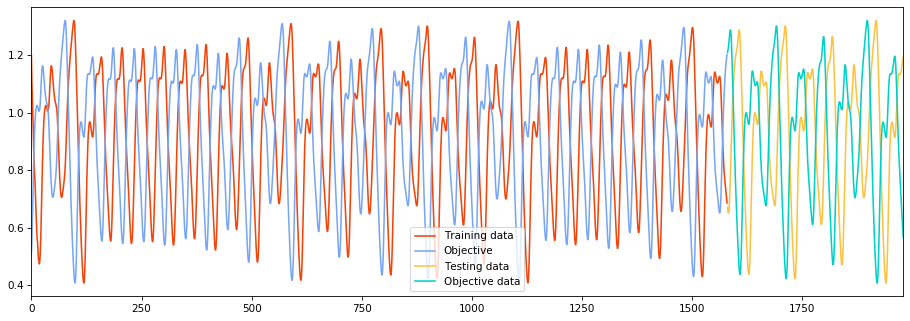

In [3]:
# X/Y and train/test split
from reservoirpy.datasets import to_forecasting

X_train, X_test, Y_train, Y_test = to_forecasting(timeseries=timeseries, test_size=400, forecast=20)

print(
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
)
cutoff = X_train.shape[0]


plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, 1580), X_train, label="Training data")
plt.plot(np.arange(0, 1580), Y_train, label="Objective")
plt.plot(np.arange(1580, 1980), X_test, label="Testing data")
plt.plot(np.arange(1580, 1980), Y_test, label="Objective data")
plt.legend()
plt.show()

In [4]:
# Model creation
reservoir = Reservoir(
    units=500, # Number of neurons inside the reservoir
    sr=1.25,   # Spectral radius of the weight matrix
    lr=0.3,    # Leak rate
    input_scaling=1. # Scaling factor applied to the input
)
readout = Ridge(ridge=1e-4) # Regularization: penalizes over-fitting
model = reservoir >> readout

In [5]:
# Training the model on the training dataset
model.fit(X_train, Y_train)

'Model-0': Model('Reservoir-0', 'Ridge-0')

In [6]:
# Testing the model on the testing dataset
Y_pred = model.run(X_test)

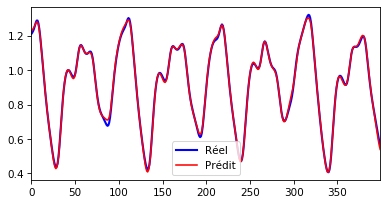

In [7]:
# Results
plt.figure(figsize=(6, 3))
plt.plot(Y_test, color="blue", linewidth=2, label="Réel")
plt.plot(Y_pred, color="red", label="Prédit")
plt.legend()
plt.show()

### Listening to the reservoir's heart

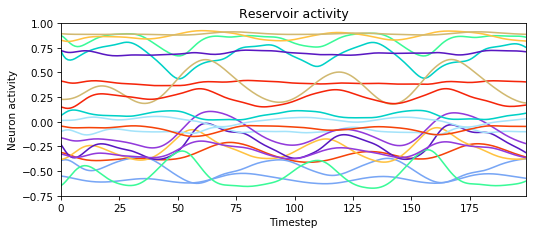

In [8]:
activity = reservoir.run(X_test)

plt.figure(figsize=(8, 3))
plt.plot(activity[:200, :20]) # 200 timestep, 20 neurons
plt.title("Reservoir activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron activity")
plt.show()